In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

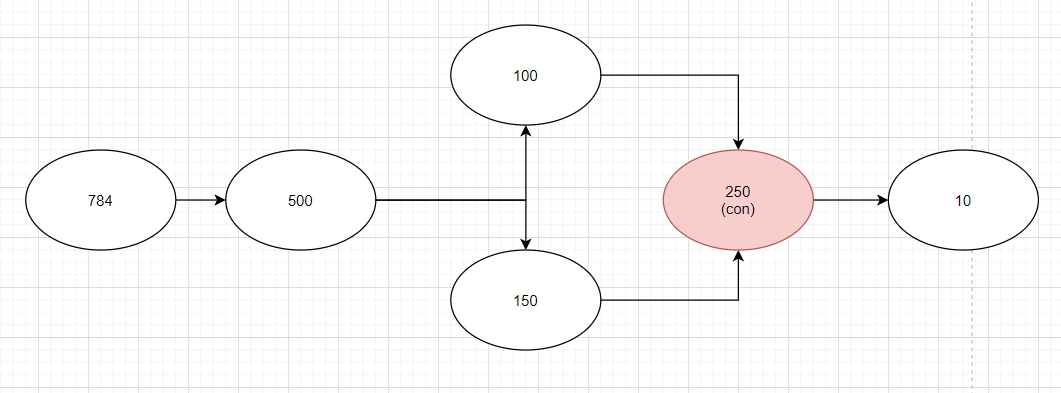

In [11]:
from IPython.display import Image
Image(filename= "pic.jpg")

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
x = Input(shape=(784,))

f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(150, activation='relu')
f_3 = Dense(100, activation='sigmoid')
f_4 = Dense(10, activation='softmax')

In [6]:
from tensorflow.keras.layers import concatenate, add
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_1)
u = concatenate([h_2, h_3])
y = f_4(u)

In [7]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 150)          75150       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          50100       dense[0][0]                      
______________________________________________________________________________________________

In [8]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, 
          batch_size = 700, 
          epochs = 12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0399 - accuracy: 0.7168
Epoch 2/12
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0250 - accuracy: 0.8276
Epoch 3/12
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0225 - accuracy: 0.8448
Epoch 4/12
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0213 - accuracy: 0.8531
Epoch 5/12
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0201 - accuracy: 0.8613
Epoch 6/12
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0194 - accuracy: 0.8676
Epoch 7/12
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0187 - accuracy: 0.8722
Epoch 8/12
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0184 - accuracy: 0.8738
Epoch 9/12
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0177 - accuracy: 0.8786
Epoch 10/12
60

In [10]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 1s 17us/sample - loss: 0.0164 - accuracy: 0.8889
Loss: 0.016356845075885456
準確率: 88.89333605766296
